###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

In [1]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as alg
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [2]:
def plot_boundary(mdl,X_train,y_train,X_test,y_test,poly=None,scaler=None,xlim=None,ylim=None):
    # Generates mesh
    if xlim == None:
        xlim = [X_train[:,0].min(), X_train[:,0].max()]
    if ylim == None:
        ylim = [X_train[:,1].min(), X_train[:,1].max()]
    pts = 200            
    x1 = np.linspace(xlim[0], xlim[1], pts)  # x1
    x2 = np.linspace(ylim[0], ylim[1], pts)  # x2
    x1, x2 = np.meshgrid(x1, x2)
    mesh = np.vstack((x1.flatten(), x2.flatten())).T
    if poly is not None:
        mesh = poly.transform(mesh)
    if scaler is not None:
        mesh = scaler.transform(mesh)
        
    # Training set
    if scaler is not None:
        temp = scaler.inverse_transform(X_train)
    plt.scatter(temp[:,0],temp[:,1],cmap='viridis',c=y_train,s=50,edgecolor='k')
    
    # Boundary
    h = mdl.predict_proba(mesh)
    indexes = set(range(h.shape[1]))
    for i in indexes:
        g = h[:,i] - h[:,list(indexes - {i})].max(axis=1)
        plt.contour(x1, x2, g.reshape((pts,pts)), levels = [0], colors='black')
    y_pred = mdl.predict(mesh)
    plt.contourf(x1, x2, y_pred.reshape((pts,pts)), alpha = 0.10,cmap='viridis')
    
    # Test set
    y_pred = mdl.predict(X_test)
    correct = (y_pred == y_test)
    if scaler is not None:
        temp = scaler.inverse_transform(X_test)
    plt.scatter(temp[correct,0],temp[correct,1], marker='.', c='black', s=60)
    plt.scatter(temp[~correct,0],temp[~correct,1], marker='x', c='black', s=60)
    
def compute_metrics(mdl,X_train,y_train,X_test,y_test):
    # trainig metrics
    y_pred = mdl.predict(X_train)
    print('Training Metrics:')
    print('Accuracy: ', '%.2f'  % accuracy_score(y_train, y_pred))
    print('F1 Score (Macro): ', '%.2f'  % f1_score(y_train, y_pred, average='macro'))
    print('Recall (Macro): ', '%.2f'  % recall_score(y_train, y_pred, average='macro'))
    print('Precision (Macro): ', '%.2f'  % precision_score(y_train, y_pred, average='macro'))
    y_pred = mdl.predict(X_test)
    print('\nTest Metrics:')
    print('Accuracy: ', '%.2f'  % accuracy_score(y_test, y_pred))
    print('F1 Score (Macro): ', '%.2f'  % f1_score(y_test, y_pred, average='macro'))
    print('Recall (Macro): ', '%.2f'  % recall_score(y_test, y_pred, average='macro'))
    print('Precision (Macro): ', '%.2f'  % precision_score(y_test, y_pred, average='macro'))

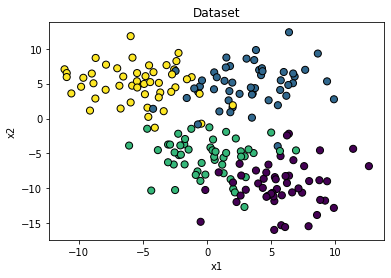

In [3]:
# Generating dataset
obs = 200
X, y = make_blobs(n_samples=obs, centers=4, n_features=2, random_state=10,cluster_std=3.0)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=50, edgecolor='k',cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
xlim = plt.xlim()
ylim = plt.ylim()
# Splits into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)
# Expand dataset to include polynomial features
d = 7
ps = PolynomialFeatures(degree = d,include_bias=False)
ps.fit(X_train)
X_train = ps.transform(X_train)
X_test = ps.transform(X_test)
# Standarize dataset
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [4]:
mdl = LogisticRegression(solver='lbfgs',multi_class='multinomial',C=1,max_iter=200)
mdl.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=200, multi_class='multinomial')

Training Metrics:
Accuracy:  0.91
F1 Score (Macro):  0.90
Recall (Macro):  0.90
Precision (Macro):  0.90

Test Metrics:
Accuracy:  0.90
F1 Score (Macro):  0.89
Recall (Macro):  0.91
Precision (Macro):  0.90


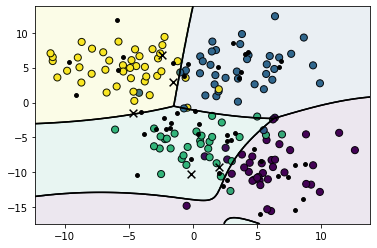

In [5]:
plot_boundary(mdl,X_train,y_train,X_test,y_test,
              poly=ps,scaler=sc,
              xlim=xlim,
              ylim=ylim)
compute_metrics(mdl,X_train,y_train,X_test,y_test)